# Linear Regression Using keras

# **1. Objective:**
In this notebook, a linear regression model is used to predict the fuel efficiency of the late-1970s and early 1980s automobiles.In a regression problem, the aim is to predict the output of a continuous value like a price or a height or a weight,  etc

# DataSet Reference:- https://www.kaggle.com/datasets/uciml/autompg-dataset

# Importing Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [5]:
# Check the version of Tensorflow and Keras
print("Tensorflow_version:",tf.__version__)
print("Keras_Version:",tf.keras.__version__)

Tensorflow_version: 2.18.0
Keras_Version: 3.8.0


# Load the Dataset

In [6]:
# Load the dataset
mpg_df = pd.read_csv("/content/sample_data/auto-mpg.csv")

In [7]:
# Print the first 5 rows of dataset
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [8]:
# Print the last 5 rows of dataset
mpg_df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [9]:
# check the shape of the dataset
mpg_df.shape

(398, 9)

In [10]:
# Check the info of the dataset
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
# Check the number of categories in the cyclinder dataset
mpg_df["cylinders"].value_counts()

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


In [12]:
# Check the number of categories in 'Model Year' feature
mpg_df["model year"].value_counts()

,count
model year,
73,40
78,36
76,34
82,31
75,30
80,29
79,29
81,29
70,29


In [13]:
# Check the number of categories in "Origin feature"
mpg_df["origin"].unique()

array([1, 3, 2])

In [14]:
# check the unique category in Horse power column
mpg_df["horsepower"].value_counts()

,count
horsepower,
150,22
90,20
88,19
110,18
100,17
...,...
77,1
132,1
64,1


# Clean and inspect the data

In [15]:
# Check the null values in the dataset
mpg_df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


In [16]:
# Check the overall statistics of the dataset
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [17]:
# Convert 'horsepower' to numeric, coercing errors to NaN
mpg_df['horsepower'] = pd.to_numeric(mpg_df['horsepower'], errors='coerce')

# Drop any rows with NaN values
mpg_df.dropna(inplace=True)

In [18]:
mpg_df[mpg_df["mpg"] > 46]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


In [19]:
# function to plot the comparison between "MPG" and other numerical features
def plot(feature):
  plt.figure(figsize=(15,8))
  plt.scatter(mpg_df[feature],mpg_df["mpg"], label='Data')
  plt.xlabel(feature)
  plt.ylabel("MPG")
  plt.legend()
  plt.show()

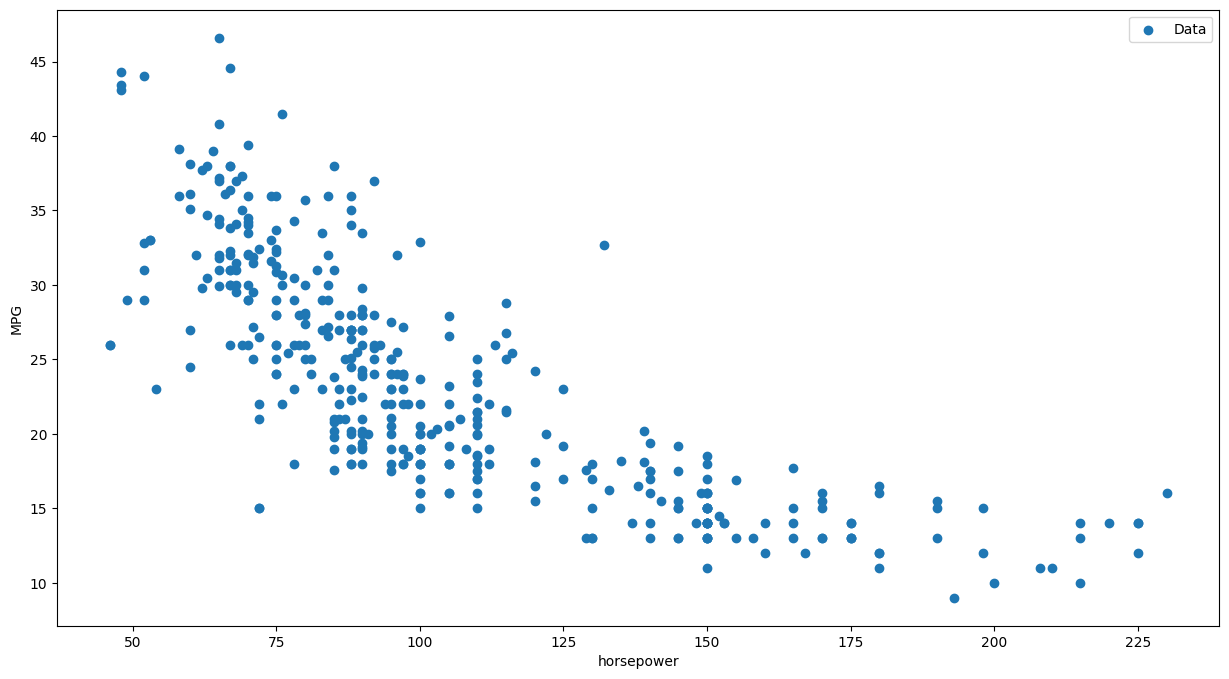

In [20]:
# Compare the MPG vs HorsePower
plot("horsepower")

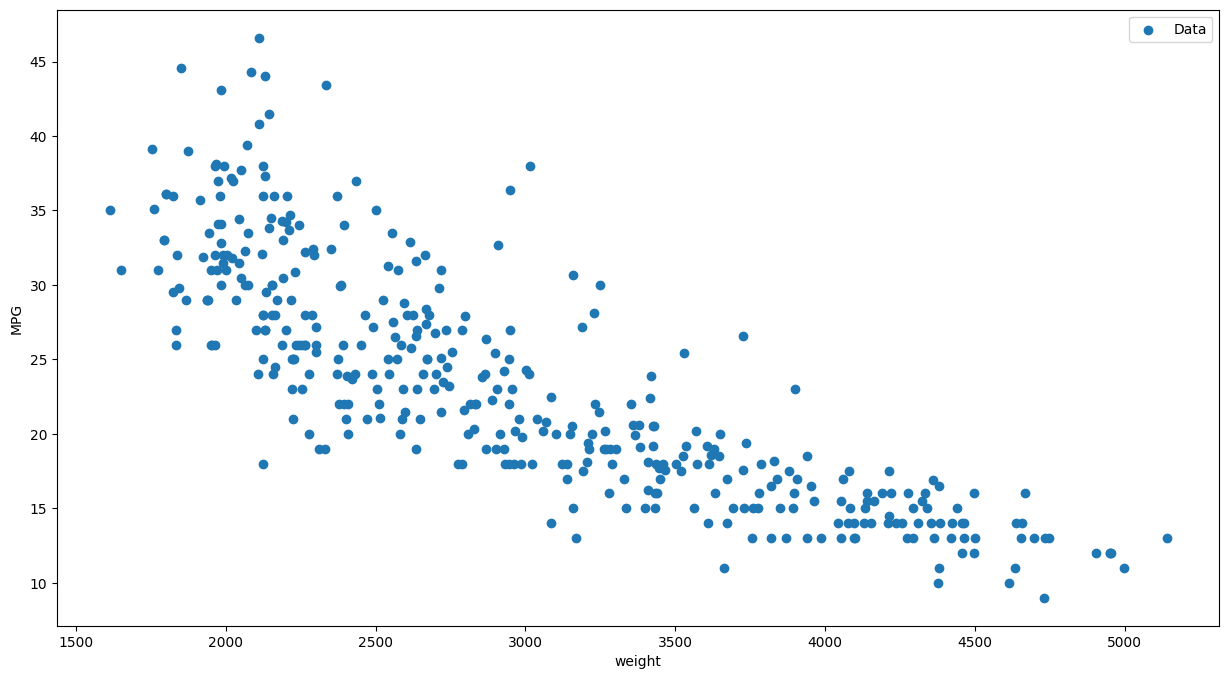

In [21]:
# Compare the "MPG" VS Weight
plot("weight")

# Prepare the data

In [22]:
# Separate the input variable and target variable
input_features = mpg_df.drop(["mpg",'car name'], axis=1)
target = mpg_df["mpg"]

In [23]:
# Import libraries for splitting the dataset into train and test split
from sklearn.model_selection import train_test_split

In [24]:
# Split the dataset into train set = 80 % and test set 20%.
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

In [25]:
# Check the shape of X_train and X_test
input_features.shape, X_train.shape, X_test.shape

((392, 7), (313, 7), (79, 7))

In [26]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
260,6,225.0,110.0,3620,18.7,78,1
184,4,140.0,92.0,2572,14.9,76,1
174,6,171.0,97.0,2984,14.5,75,1
64,8,318.0,150.0,4135,13.5,72,1
344,4,86.0,64.0,1875,16.4,81,1


In [27]:
# Normalize the numerical features using keras normalization
from tensorflow.keras.layers import Normalization

In [28]:
# The first step is to create a normalization layer
normalizer = Normalization()

In [29]:
# Then fit the state of the preprocessing layer to the data by calling Normalization.adpat .
normalizer.adapt(np.array(X_train))

In [30]:
# Calculate the mean and variance, and store them in the layer
print("Mean:",normalizer.mean.numpy())
print("Variance:",normalizer.variance.numpy())

Mean: [[5.48242807e+00 1.95517578e+02 1.04594246e+02 2.98612451e+03
  1.55440893e+01 7.62076645e+01 1.55591059e+00]]
Variance: [[2.8822792e+00 1.0733100e+04 1.4609568e+03 7.0524594e+05 7.9149890e+00
  1.3135788e+01 6.4942992e-01]]


In [31]:
# When the layer is called, it returns the input data, with each feature independently normalized.
first = np.array(X_train[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

First example: [[   6.   225.   110.  3620.    18.7   78.     1. ]]

Normalized: [[ 0.3   0.28  0.14  0.75  1.12  0.49 -0.69]]


# Building a Linear Regression Neural Network

In [32]:
# import libraries for building sequential models with dense layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [33]:
# define the sequential model
model = Sequential()

# add the input layer with 7 features
model.add(tf.keras.Input(shape= (7,), name = 'Input Layer'))
model.add(normalizer)

# Add the 2 dense layer
model.add(Dense(64, activation="relu", name = 'Hidden_Layer1'))
model.add(Dense(64, activation="relu", name = 'Hidden_Layer2'))

# Add the outpt layer
model.add(Dense(1, name = 'Output_Layer'))


In [34]:
# Print the summary of a model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 7)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer1 (Dense)           │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer2 (Dense)           │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,752 (18.57 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 15 (64.00 B)

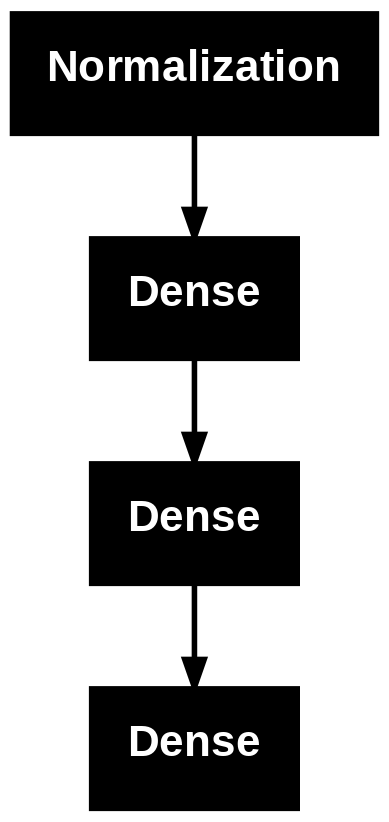

In [35]:
# plotting the model
from tensorflow.keras.utils import plot_model
plot_model(model)

# Compile the Neural Network

In [36]:
# Compile the model with 0.001 as learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mae")

# Training a Neural Network/

In [37]:
# define the batch size and number of epochs
batch_size = 16
num_epochs = 100

# fit a neural network or train a neural network model
linear_regressor = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1,validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 23.2334 - val_loss: 24.0641
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.9390 - val_loss: 22.5682
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.9515 - val_loss: 20.2873
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.3845 - val_loss: 16.9078
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.1700 - val_loss: 13.0885
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10.6601 - val_loss: 7.8217
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.2687 - val_loss: 4.7767
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1091 - val_loss: 4.2291
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8739 - val_loss: 3.8046
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3817 - val_loss: 3.4366
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2773 - val_loss: 3.1614
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

In [38]:
# prompt: why i am getting loss = nan and val_loss as nan values

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0) # Clip gradients to a max norm of 1.0
model.compile(optimizer=optimizer, loss="mae")


# Evaluate a trained network

In [39]:
# Evaluate our neural network using test dataset
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 1.839013934135437


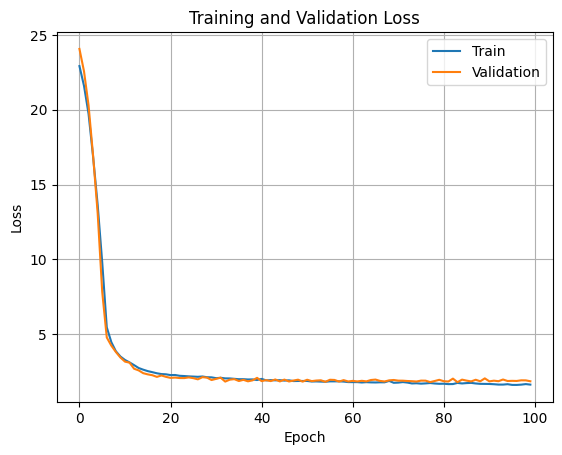

In [40]:
# Plot training loss and validation loss
plt.plot(linear_regressor.history['loss'], label='Training Loss')
plt.plot(linear_regressor.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Validation'])
plt.grid()
plt.show()


# Inference on New data

In [41]:
# prediction on test dataset using predict() method
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [42]:
# Check predictions on first 10 datapoints from X_test
y_pred[:10]

array([[24.273287],
       [21.797125],
       [34.363247],
       [22.81244 ],
       [28.690683],
       [29.65885 ],
       [12.955915],
       [30.775621],
       [19.664202],
       [30.496244]], dtype=float32)

In [43]:
# Convert or flattern 2d array to 1d array
y_pred = y_pred.flatten()

In [44]:
# Compare the actual and prediction values for first 10 datapoints
print("Actual Values:",np.array(y_test[:10]))
print("Predicted Values:",y_pred[:10])

Actual Values: [26.  21.6 36.1 26.  27.  28.  13.  26.  19.  29. ]
Predicted Values: [24.273287 21.797125 34.363247 22.81244  28.690683 29.65885  12.955915
 30.775621 19.664202 30.496244]


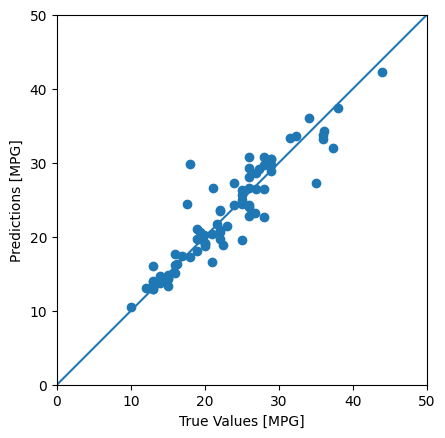

In [45]:
# check how best fit the line is?
a = plt.axes(aspect = 'equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0, 0.5, 'Count')

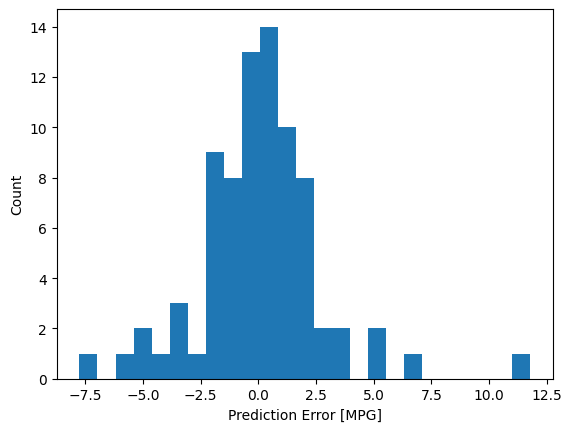

In [46]:
# Check the distribution of errors
error = y_pred - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Count")